🎯 Desafio dia 80 — Compras em Supermercado

📂 Dataset: desafio_dia_80_compras_supermercado.csv
📥 Clique aqui para baixar o CSV

🔍 Contexto: Um supermercado está analisando o comportamento dos clientes ao longo da semana. O objetivo é entender como as compras variam por categoria, forma de pagamento e valor.

🛠️ Tarefas do desafio:

🧹 Tratamento de dados
- Preencha os valores ausentes na coluna valor com a mediana.

- Preencha os valores ausentes na coluna forma_pagamento com o valor mais frequente.

📊 Análise geral
- Qual é a categoria de produto mais vendida em termos de quantidade?

- Qual o valor médio das compras por forma de pagamento?

📈 Visualização de dados
- Crie um gráfico de barras horizontal mostrando o valor total de compras por dia da semana (dia_semana).

🤖 Machine Learning - Regressão
- Crie um modelo para prever o valor da compra com base nas colunas:

    dia_semana, categoria, forma_pagamento

    Use train_test_split, get_dummies, RandomForestRegressor e avalie o desempenho com mean_squared_error.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("desafio_dia_80_compras_supermercado.csv")
df.head()

,id_compra,dia_semana,categoria,valor,forma_pagamento
0,9001,Sexta,Limpeza,28.03,Cartão Débito
1,9002,Domingo,Bebidas,37.90,Cartão Crédito
2,9003,Quinta,Pet,15.23,Cartão Débito
3,9004,Quarta,Outros,34.07,Cartão Débito
4,9005,Quarta,Bebidas,75.31,Cartão Débito


In [3]:
#Preencha os valores ausentes na coluna valor com a mediana
df["valor"] = df["valor"].fillna(df["valor"].median())
df["valor"].isna().sum()

0

In [4]:
#Preencha os valores ausentes na coluna forma_pagamento com o valor mais frequente.
df["forma_pagamento"] = df["forma_pagamento"].fillna(df["forma_pagamento"].mode()[0])
df["forma_pagamento"].isna().sum()

0

In [7]:
#Qual é a categoria de produto mais vendida em termos de quantidade?
produtos_vendidos_quantidade = df["categoria"].value_counts()
print(produtos_vendidos_quantidade)

categoria
Higiene      98
Limpeza      95
Bebidas      85
Pet          82
Outros       70
Alimentos    70
Name: count, dtype: int64


In [8]:
#Qual o valor médio das compras por forma de pagamento?
valor_medio_forma_pagamento = df.groupby("forma_pagamento")["valor"].mean()
print(valor_medio_forma_pagamento)

forma_pagamento
Cartão Crédito    38.640279
Cartão Débito     34.923843
Dinheiro          47.663300
Pix               43.213039
Name: valor, dtype: float64


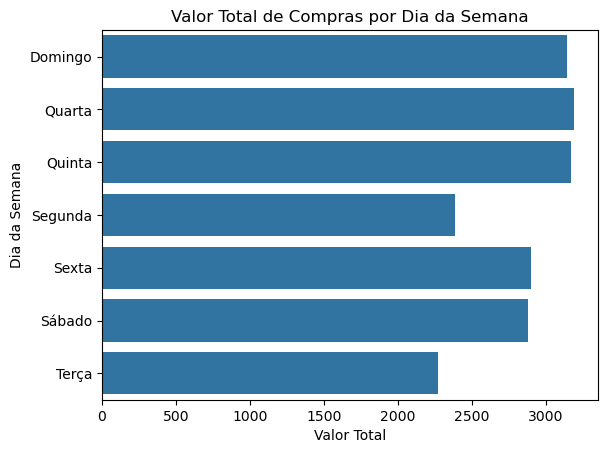

In [11]:
#Crie um gráfico de barras horizontal mostrando o valor total de compras por dia da semana (dia_semana).
valor_total_dia_semana = df.groupby("dia_semana")["valor"].sum()
sns.barplot(x=valor_total_dia_semana.values, y=valor_total_dia_semana.index)
plt.title("Valor Total de Compras por Dia da Semana")
plt.xlabel("Valor Total")
plt.ylabel("Dia da Semana")
plt.show()

In [15]:
#Crie um modelo para prever o valor da compra com base nas colunas:
X = df[["dia_semana", "categoria", "forma_pagamento"]]
y = df["valor"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(mean_squared_error(y_test, y_pred))

827.9383316975334
